In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import wrangle_functions
import env
import acquire
import summarize
# import prepare

In [2]:
# use zillow;
# from our acquire.py:

acquire.get_connection('zillow')
    

def new_zillow_data():
    df = pd.read_sql('''SELECT *
    FROM properties_2017
    LEFT OUTER JOIN airconditioningtype 
    USING(airconditioningtypeid) 
    LEFT OUTER JOIN architecturalstyletype
    USING(architecturalstyletypeid) 
    LEFT OUTER JOIN buildingclasstype 
    USING(buildingclasstypeid) 
    LEFT OUTER JOIN heatingorsystemtype
    USING(heatingorsystemtypeid) 
    LEFT OUTER JOIN predictions_2017
    ON predictions_2017.id = properties_2017.id
    INNER JOIN (
    SELECT id, MAX(transactiondate) as last_trans_date 
    FROM predictions_2017
    GROUP BY id
    ) predictions ON predictions.id = properties_2017.id AND predictions_2017.transactiondate = predictions.last_trans_date
    LEFT OUTER JOIN propertylandusetype
    USING(propertylandusetypeid)
      LEFT OUTER JOIN storytype
    USING(storytypeid)
    LEFT OUTER JOIN typeconstructiontype
    USING(typeconstructiontypeid)
    JOIN unique_properties
      ON unique_properties.parcelid = properties_2017.parcelid
    WHERE latitude IS NOT NULL and longitude IS NOT NULL;''', acquire.get_connection('zillow'))
    return df

1. Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.`m

In [3]:
df = new_zillow_data()

In [4]:
summarize.summarize(df)



Dataframe head: 
|    |   typeconstructiontypeid |   storytypeid |   propertylandusetypeid |   heatingorsystemtypeid |   buildingclasstypeid |   architecturalstyletypeid |   airconditioningtypeid |   id |   parcelid |   basementsqft |   bathroomcnt |   bedroomcnt |   buildingqualitytypeid |   calculatedbathnbr |   decktypeid |   finishedfloor1squarefeet |   calculatedfinishedsquarefeet |   finishedsquarefeet12 |   finishedsquarefeet13 |   finishedsquarefeet15 |   finishedsquarefeet50 |   finishedsquarefeet6 |   fips |   fireplacecnt |   fullbathcnt |   garagecarcnt |   garagetotalsqft |   hashottuborspa |    latitude |    longitude |   lotsizesquarefeet |   poolcnt |   poolsizesum |   pooltypeid10 |   pooltypeid2 |   pooltypeid7 | propertycountylandusecode   | propertyzoningdesc   |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidneighborhood |   regionidzip |   roomcnt |   threequarterbathnbr |   unitcnt |   yardbuildingsqft17 |   yardbuildingsqft26 |   year

|       |   typeconstructiontypeid |   storytypeid |   propertylandusetypeid |   heatingorsystemtypeid |   buildingclasstypeid |   architecturalstyletypeid |   airconditioningtypeid |      id |        parcelid |   basementsqft |   bathroomcnt |   bedroomcnt |   buildingqualitytypeid |   calculatedbathnbr |   decktypeid |   finishedfloor1squarefeet |   calculatedfinishedsquarefeet |   finishedsquarefeet12 |   finishedsquarefeet13 |   finishedsquarefeet15 |   finishedsquarefeet50 |   finishedsquarefeet6 |       fips |   fireplacecnt |   fullbathcnt |   garagecarcnt |   garagetotalsqft |   hashottuborspa |         latitude |        longitude |   lotsizesquarefeet |   poolcnt |   poolsizesum |   pooltypeid10 |   pooltypeid2 |   pooltypeid7 |   rawcensustractandblock |   regionidcity |   regionidcounty |   regionidneighborhood |   regionidzip |     roomcnt |   threequarterbathnbr |     unitcnt |   yardbuildingsqft17 |   yardbuildingsqft26 |   yearbuilt |   numberofstories |   fireplaceflag 

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77614 entries, 0 to 77613
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        166 non-null    float64
 1   storytypeid                   45 non-null     float64
 2   propertylandusetypeid         77614 non-null  float64
 3   heatingorsystemtypeid         48475 non-null  float64
 4   buildingclasstypeid           383 non-null    float64
 5   architecturalstyletypeid      151 non-null    float64
 6   airconditioningtypeid         21457 non-null  float64
 7   id                            77614 non-null  int64  
 8   parcelid                      77614 non-null  int64  
 9   basementsqft                  45 non-null     float64
 10  bathroomcnt                   77614 non-null  float64
 11  bedroomcnt                    77614 non-null  float64
 12  buildingqualitytypeid         50322 non-null  float64
 13  c

In [12]:
df.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,parcelid,basementsqft,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,parcelid,logerror,id,parcelid
count,166.00,45.00,"77,614.00","48,475.00",383.00,151.00,"21,457.00","77,614.00","77,614.00",45.00,...,"77,614.00","76,003.00","77,103.00","1,505.00","75,519.00","77,614.00","77,614.00","77,614.00","77,614.00","77,614.00"
mean,5.99,7.00,259.94,4.04,3.78,7.43,1.93,"38,806.50","13,379,428.47",593.13,...,"2,016.00","265,047.58","5,371.52",13.91,"60,489,761,355,119.06","38,806.50","13,007,807.98",0.02,"38,806.50","13,379,428.47"
std,0.16,0.00,16.97,3.23,0.46,2.63,3.13,"22,405.38","8,351,447.64",460.92,...,0.07,"528,079.16","10,407.55",1.54,"210,075,285,376.01","22,405.38","3,518,694.35",0.17,"22,405.38","8,351,447.64"
min,4.00,7.00,31.00,1.00,1.00,2.00,1.00,0.00,"10,711,745.00",63.00,...,"2,003.00",4.00,2.54,6.00,"60,371,011,101,000.00",0.00,"10,711,855.00",-4.66,0.00,"10,711,745.00"
25%,6.00,7.00,261.00,2.00,4.00,7.00,1.00,"19,403.25","11,585,723.50",220.00,...,"2,016.00","78,406.50","2,449.60",14.00,"60,373,106,017,007.00","19,403.25","11,538,214.00",-0.02,"19,403.25","11,585,723.50"
50%,6.00,7.00,261.00,2.00,4.00,7.00,1.00,"38,806.50","12,532,247.00",540.00,...,"2,016.00","175,342.00","4,006.66",14.00,"60,375,718,002,010.00","38,806.50","12,530,061.50",0.01,"38,806.50","12,532,247.00"
75%,6.00,7.00,261.00,7.00,4.00,7.00,1.00,"58,209.75","14,115,087.00",732.00,...,"2,016.00","324,677.00","6,198.60",15.00,"60,590,423,262,017.00","58,209.75","14,211,001.25",0.04,"58,209.75","14,115,087.00"
max,6.00,7.00,275.00,24.00,5.00,21.00,13.00,"77,613.00","169,601,949.00","2,443.00",...,"2,016.00","94,011,079.00","1,824,154.85",15.00,"61,110,091,003,005.00","77,613.00","167,689,317.00",5.26,"77,613.00","169,601,949.00"


In [13]:
df.columns

Index(['typeconstructiontypeid', 'storytypeid', 'propertylandusetypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'id', 'parcelid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17',

In [ ]:
# these columns 
cols_to_drop = ['typeconstructiontypeid', 'storytypeid', 'propertylandusetypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid', 'id', 'parcelid',
       'basementsqft','buildingqualitytypeid',
       'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet','finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6','fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa','lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock', 'airconditioningdesc', 'architecturalstyledesc',
       'buildingclassdesc', 'heatingorsystemdesc', 'id', 'propertylandusedesc', 'storydesc', 'typeconstructiondesc']

In [6]:
wrangle_functions.nulls_by_col(df)

,num_rows_missing,percent_rows_missing
typeconstructiontypeid,77448,99.79
storytypeid,77569,99.94
propertylandusetypeid,0,0.00
heatingorsystemtypeid,29139,37.54
buildingclasstypeid,77231,99.51
...,...,...
last_trans_date,0,0.00
propertylandusedesc,0,0.00
storydesc,77569,99.94
typeconstructiondesc,77448,99.79


In [7]:
wrangle_functions.nulls_by_row(df)

,num_cols_missing,percent_cols_missing,index
0,24,32.87671232876712,12
1,25,34.24657534246575,22
2,26,35.61643835616438,46
3,27,36.986301369863014,161
4,28,38.35616438356164,348
5,29,39.726027397260275,4311
6,30,41.0958904109589,2853
7,31,42.465753424657535,8979
8,32,43.83561643835616,11547
9,33,45.20547945205479,15183


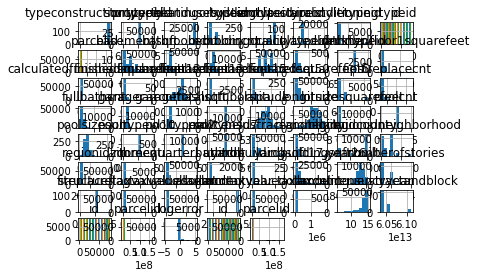

In [9]:
df.hist()
#plt.tight_layout()
plt.show()

In [ ]:
#outlier
df = df.loc[:,~df.columns.duplicated()]